# Extração de Tabelas
---

# Imports

In [23]:
from decimal import Decimal
import pdfplumber
import pandas as pd
import numpy as np
from dataclasses import dataclass
from IPython.display import display
from os import listdir

# Open

In [24]:
path = "in/enel/"
files = listdir(path)
i_file = 0
pdf = pdfplumber.open(path + files[i_file])
display(
    files,
    files[i_file]
)

['Barbosa ENEL_SP loja 26 mai21.pdf',
 'Barbosa ENEL_SP loja 26 abr21.pdf',
 'Barbosa ENEL_SP loja 19 mai21.pdf',
 '2 impresso - Barbosa ENEL_SP loja 26 abr21.pdf',
 'Barbosa ENEL_SP loja 37 mai21.pdf',
 'Barbosa ENEL_SP loja 37 abr21.pdf',
 'Barbosa ENEL_SP loja 31 abr21.pdf',
 'Barbosa ENEL_SP loja 33 mai21.pdf',
 'Barbosa ENEL_SP loja 19 abr21.pdf',
 'Barbosa ENEL_SP loja 28 abr21.pdf',
 'Barbosa ENEL_SP loja 21 abr21.pdf',
 'Barbosa ENEL_SP loja 38 abr21.pdf',
 'Barbosa ENEL_SP loja 28 mai21.pdf',
 'Barbosa ENEL_SP loja 33 abr21.pdf',
 'Barbosa ENEL_SP loja 35 mai21.pdf',
 'Barbosa ENEL_SP loja 38 mai21.pdf',
 'Barbosa ENEL_SP loja 35 abr21.pdf',
 'Barbosa ENEL_SP loja 31 mai21.pdf',
 'Barbosa ENEL_SP loja 21 mai21.pdf',
 '1 impresso - Barbosa ENEL_SP loja 33 abr21.pdf']

'Barbosa ENEL_SP loja 26 mai21.pdf'

# Display Dataframe

In [25]:
def df(vertical: list, horizontal: list, page: int):
    _df = pd.DataFrame(pdf.pages[page].extract_tables({
        "vertical_strategy": "explicit", "horizontal_strategy": "explicit", "snap_tolerance": 3,
        "explicit_vertical_lines": vertical, "explicit_horizontal_lines": horizontal,
    })[0])
    _df.replace('', np.nan, inplace=True)
    _df.dropna(how="all", inplace=True)
    _df.replace(np.nan, '', inplace=True)
    return _df

# Display image

In [26]:
def im(vertical: list, horizontal: list, page: int, resolution=40):
    return pdf.pages[page].to_image(resolution=resolution).debug_tablefinder({
        "vertical_strategy": "explicit", "horizontal_strategy": "explicit", "snap_tolerance": 3,
        "explicit_vertical_lines": vertical, "explicit_horizontal_lines": horizontal,
    })

# Objeto linha `NOVO`

In [27]:
def vline(x: float, top: float = 0, bottom: float = 900, *, height: float = 3, width: float = 3):
    return {
        "top": Decimal(top),
        "bottom": Decimal(bottom),
        "x0": Decimal(x),
        "x1": Decimal(x),
        "height": Decimal(3),
        "width": Decimal(3),
        "object_type": "line"
    }


def hline(y: float, left: float = 0, right: float = 600, *, height: float = 3, width: float = 3):
    return {
        "top": Decimal(y),
        "bottom": Decimal(y),
        "x0": Decimal(left),
        "x1": Decimal(right),
        "height": Decimal(3),
        "width": Decimal(3),
        "object_type": "line"
    }

# Extração de Tabelas

- ## Tabela 1: Dados do Cliente/Unidade Consumidora `PG 0`

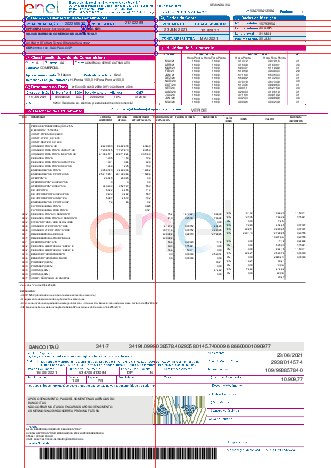

,0,1,2
0,202256530,,21702299
1,CPF/CNPJ: 60.437.647/0033-94,INSC. EST:,
2,SILVA E BARBOSA COMERCIO DE ALIMENTOS LT,,
3,AV ENG HEITOR ANTONIO EIRAS GARCIA 4592,,
4,CEP: 05564-100 - SAO PAULO/SP,,


In [28]:
cf = (
    [43.3, vline(150, 47.8, 56), vline(160, 37, 47.8), 280],
    [37, 47.8, 56, 73, 81, 96],
    0,
)
display(
    im(*cf),
    df(*cf),
)

- ## Tabela 2: Dados da Conta `PG 0`

In [29]:
# TODO

- ## Tabela 3: Dados de Medição `PG 0`

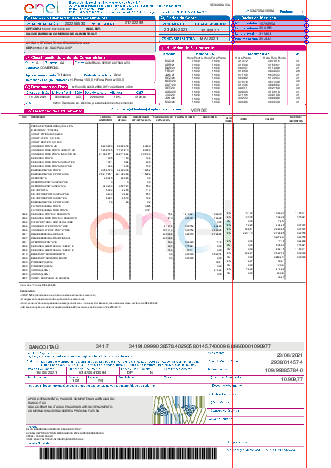

,0
0,15793954
1,30 ABR
2,31 MAI
3,30 JUN


In [30]:
cf = (
    [419, 551],
    [36, 46, 56, 66, 76],
    0,
)
display(
    im(*cf),
    df(*cf),
)

- ## Tabela 4: Classificação da Unidade Consumidora `PG 0`

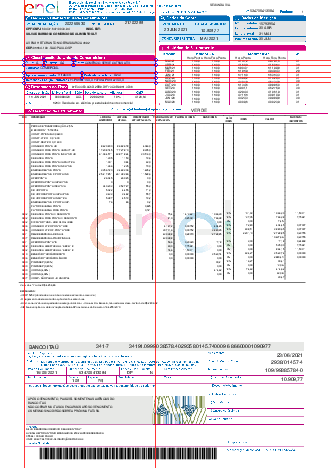

,0,1,2,3
0,A,A4,"COMÉRCIO, SERV.E OUTRAS ATIV.",
1,COMERCIAL,,,
2,Trifásico,,,Azul
3,"H.Ponta 150,0 H.Fora Ponta 150,0",,,


In [31]:
cf = (
    [43.3, vline(79, 108, 117), vline(132, 108, 117), vline(147, 131, 140), 280],
    [108, 117, 131, 140, 149],
    0,
)
display(
    im(*cf),
    df(*cf),
)

- ## Tabela 5: Histórico de Faturamento `PG 0`

In [32]:
# TODO

- ## Tabela 6: Reservado ao Fisco `PG 0`

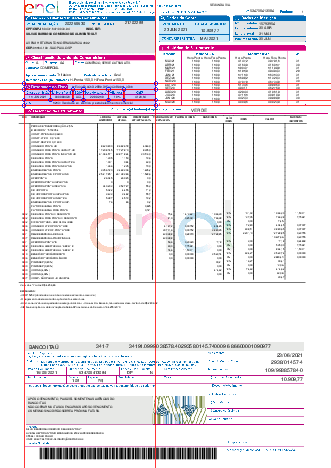

,0,1,2,3,4,5
0,87E3.33E3.0C6D.2BB8.D1F7.3C0B.9851.3D70,,,,,
1,15 JUN 2021,000089423,ACL,"22.892,58",18%,"4.120,64"
2,5253: Venda de en. elétrica p/ estabeleciment...,,,,,


In [33]:
cf = (
    [43.3, vline(91, 161, 180), vline(131, 161, 180), vline(150, 161, 180), vline(195, 161, 180), vline(223, 161, 180), 280],
    [150, 161, 180, 190],
    0,
)
display(
    im(*cf),
    df(*cf),
)

- ## Tabela 7: Descrição de Faturamento `PG 0`

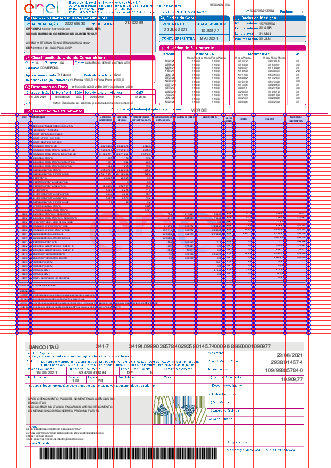

,0,1,2,3,4,5,6,7,8,9,10,11
0,CCI,DESCRIÇÃO,LEITURA \nANTERIOR,LEITURA \nATUAL,REGISTRADO \nkW/kWh/kvarh,FATURADO kW/\nkWh/kvarh,TARIFA C/ ICMS,BASE ICMS,ALÍQ \nICMS,ICMS,VALOR,TARIFA S/ \nIMPOSTOS
1,,"PERDA DE TRANSFORMAÇÃO - 2,5%",,,,,,,,,,
2,,MEDIDOR N° 15793954,,,,,,,,,,
3,,"CONST. POTENCIA 0,06400",,,,,,,,,,
4,,"CONST. ATIVO 0,01600",,,,,,,,,,
5,,"CONST. REATIVO 0,01600",,,,,,,,,,
6,,CONSUMO PONTA VM,8.429.800,8.682.678,"4.046,0",,,,,,,
7,,CONSUMO FORA PONTA CAPACIT. VM,17.208.745,17.727.810,"8.305,0",,,,,,,
8,,CONSUMO FORA PONTA INDUTIVO VM,61.964.571,63.871.824,"30.516,0",,,,,,,
9,,DEMANDA PONTA,1.305,1.150,"73,6",,,,,,,


In [34]:
cf = (
    [30, 55, 205, 175, 235, 275, 313, 352, 402, 421, 456, 513, 555],
    [207, *[222+7.25*i for i in range(53)]],
    0,
)
display(
    im(*cf),
    df(*cf),
)

- ## Tabela 1: { Datas } `PG 1`

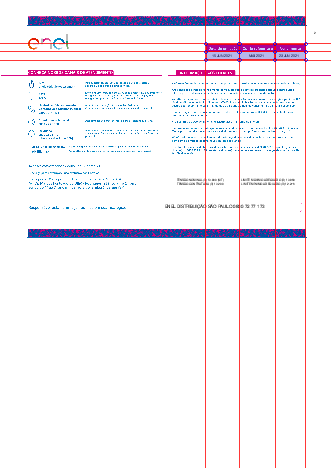

,0,1,2
1,15 JUN 2021,MAI 2021,23 JUN 2021


In [35]:
cf = (
    [370, 431, 495,  550],
    [79, 93, 108],
    1,
)
display(
    im(*cf),
    df(*cf),
)